In [1]:
%matplotlib qt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import plotly.graph_objects as go

In [2]:
avgMonth = pd.read_csv('avgMonthData.csv')
avgMonth

,Year,Month,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,...,r9_temp,r1_prec,r2_prec,r3_prec,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec
0,1958,1,0.629797,-10.307143,-9.950000,-9.189286,-9.264286,-9.392857,-9.242857,-8.910714,...,-8.367857,1.978571,1.839286,2.271429,2.075000,1.935714,1.814286,2.157143,1.978571,1.603571
1,1958,2,0.587594,-13.725000,-13.196429,-12.507143,-12.475000,-12.628571,-12.096428,-12.042857,...,-12.039286,1.164286,1.057143,0.896429,1.096429,1.260714,1.228571,1.203571,1.267857,1.478571
2,1958,3,0.568484,-12.016129,-11.200000,-8.829032,-10.364516,-10.529032,-8.841935,-9.787097,...,-8.125806,0.096774,0.000000,0.074194,0.122581,0.196774,0.038710,0.190323,0.174194,0.209677
3,1958,4,4.465059,-3.773333,-2.920000,0.043333,-1.976667,-2.270000,-0.940000,-1.496667,...,0.460000,1.296667,1.353333,1.110000,1.493333,1.963333,2.150000,1.703333,2.203333,2.373333
4,1958,5,16.584016,1.387097,2.393548,5.603226,3.448387,3.116129,4.458065,3.964516,...,6.187097,2.064516,2.138710,1.980645,2.180645,2.290323,2.719355,2.403226,2.803226,2.909677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2015,8,11.422987,9.438710,10.219355,13.003226,10.948387,10.741935,12.125806,11.348387,...,13.938710,3.380645,3.593548,3.893548,4.003226,3.912903,3.612903,4.119355,3.867742,3.416129
692,2015,9,28.201833,6.103333,6.823333,9.376667,7.613333,7.353333,8.570000,8.033333,...,10.170000,5.716667,5.403333,7.550000,6.646667,6.586667,7.023333,7.276667,7.840000,7.733333
693,2015,10,2.733366,1.641935,2.125806,3.987097,2.674194,2.561290,3.535484,3.000000,...,4.796774,0.274194,0.264516,0.458065,0.383871,0.348387,0.316129,0.445161,0.332258,0.206452
694,2015,11,3.136748,-1.643333,-1.296667,-0.273333,-0.680000,-0.813333,-0.353333,-0.310000,...,0.316667,1.886667,2.056667,1.910000,2.126667,2.033333,2.220000,1.773333,1.483333,2.033333


In [6]:
avgMonth['Season'] = ''

for i in range(len(avgMonth["Month"])):
    if avgMonth["Month"][i] in [1, 2, 12]:
        avgMonth["Season"][i] = "Winter"
    elif avgMonth["Month"][i] in [4, 5, 3]:
        avgMonth["Season"][i] = "Spring"
    elif avgMonth["Month"][i] in [7, 8, 6]:
        avgMonth["Season"][i] = "Summer"
    elif avgMonth["Month"][i] in [10, 11, 9]:
        avgMonth["Season"][i] = "Fall"


df = pd.DataFrame()
df['Year'] = avgMonth['Year']
df['Month'] = avgMonth['Month']
df['Season'] = avgMonth['Season']
df['flow'] = avgMonth['flow']
df['Temp'] = avgMonth[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]].mean(axis = 1)
df['Prec'] = avgMonth[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]].mean(axis = 1)

df

<ipython-input-6-a1339d29b36d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Winter"
<ipython-input-6-a1339d29b36d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Spring"
<ipython-input-6-a1339d29b36d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgMonth["Season"][i] = "Summer"
<ipython-input-6-a1339d29b36d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Year,Month,Season,flow,Temp,Prec
0,1958,1,Winter,0.629797,-9.278968,1.961508
1,1958,2,Winter,0.587594,-12.514683,1.183730
2,1958,3,Spring,0.568484,-9.787097,0.122581
3,1958,4,Spring,4.465059,-1.451481,1.738519
4,1958,5,Spring,16.584016,3.987814,2.387814
...,...,...,...,...,...,...
691,2015,8,Summer,11.422987,11.614337,3.755556
692,2015,9,Fall,28.201833,8.135556,6.864074
693,2015,10,Fall,2.733366,3.146595,0.336559
694,2015,11,Fall,3.136748,-0.575185,1.947037


### PCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)#2)

pca.fit_transform(newTemp)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(newTemp)
dfTempPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfTempPCA

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)#2)

pca.fit_transform(newTemp)
print(pca.explained_variance_ratio_)
principal_components = pca.fit_transform(newTemp)
dfTempPCA = pd.DataFrame(data=principal_components, columns=['Comp 1'])#,'Comp 2'])

print(pca.singular_values_)
print(pca.components_)
dfTempPCA

Componentes similares, entonces se hace un promedio de las regiones EPA.gov divided stuff like that.

In [ ]:

avgMonth["r1_temp"].plot()


x = np.linspace(0, len(avgMonth["Year"]), len(avgMonth["Year"]))
y = avgMonth["r1_temp"]

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

### Homología Simplicial

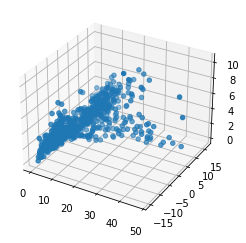

In [4]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(newAvgMonth['flow'], newAvgMonth['Temp'], newAvgMonth['Prec']) # plot the point (2,3,4) on the figure

plt.show()

In [7]:
from sklearn.metrics import pairwise_distances
import gudhi as gd

def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list


def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

In [11]:
def lotsHomologyY(year1, year2, var1, var2):
    f = df[(df['Year']>=year1)]
    f = f[f['Year'] < year2]
    f = f[[var1, var2]].to_numpy()
    D = pairwise_distances(f)

    r = .3
    G = create_simplicial_complex(D,r)
    nx.draw_kamada_kawai(G)

    rs = [0,0.1,0.2,0.3,0.4,0.5,0.6,1,2]
    pos = {n:f[n,:] for n in range(len(f))}

    plt.figure(figsize = (20,20))

    for (j,r) in enumerate(rs):
        G = create_simplicial_complex(D,r)
        plt.subplot(3,3,j+1)
        nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
        plt.axis('equal')
        plt.title('Radius = '+str(r))

    plt.show()

    r = 1.5
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)

    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)

    fig, ax = plt.subplots(figsize = (10,10))

    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=.15)
    p.set_array(np.array(colors))
    ax.add_collection(p)

    plt.axis('equal')
    plt.show()

    rs = [0,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1]
    pos = {n:f[n,:] for n in range(len(f))}

    plt.figure(figsize = (20,20))

    for (j,r) in enumerate(rs):
        G, two_spx_list = create_2_dim_simplicial_complex(D,r)
        patches = []

        for i,spx in enumerate(two_spx_list):
            position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
            polygon = Polygon(position_array, True)
            patches.append(polygon)
            
        ax = plt.subplot(3,3,j+1)
        nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
        colors = 100*np.random.rand(len(patches))
        p = PatchCollection(patches, alpha=0.05)
        p.set_array(np.array(colors))
        ax.add_collection(p)
        
        plt.axis('equal')
        plt.title('Radius = '+str(r))

    plt.show()

    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 2) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = 3)

    rips_filtration = Rips_complex.get_filtration()
    rips_list = list(rips_filtration)
    print('Number of Simplices:',len(rips_list))

    BarCodes = Rips_complex.persistence()
    gd.plot_persistence_diagram(BarCodes)
    plt.show()

    gd.plot_persistence_barcode(BarCodes)
    plt.show()

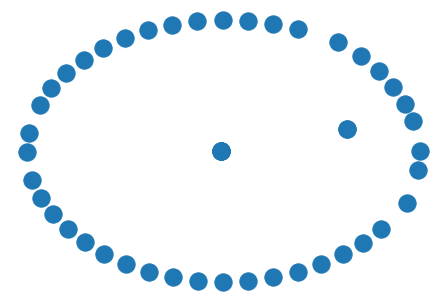

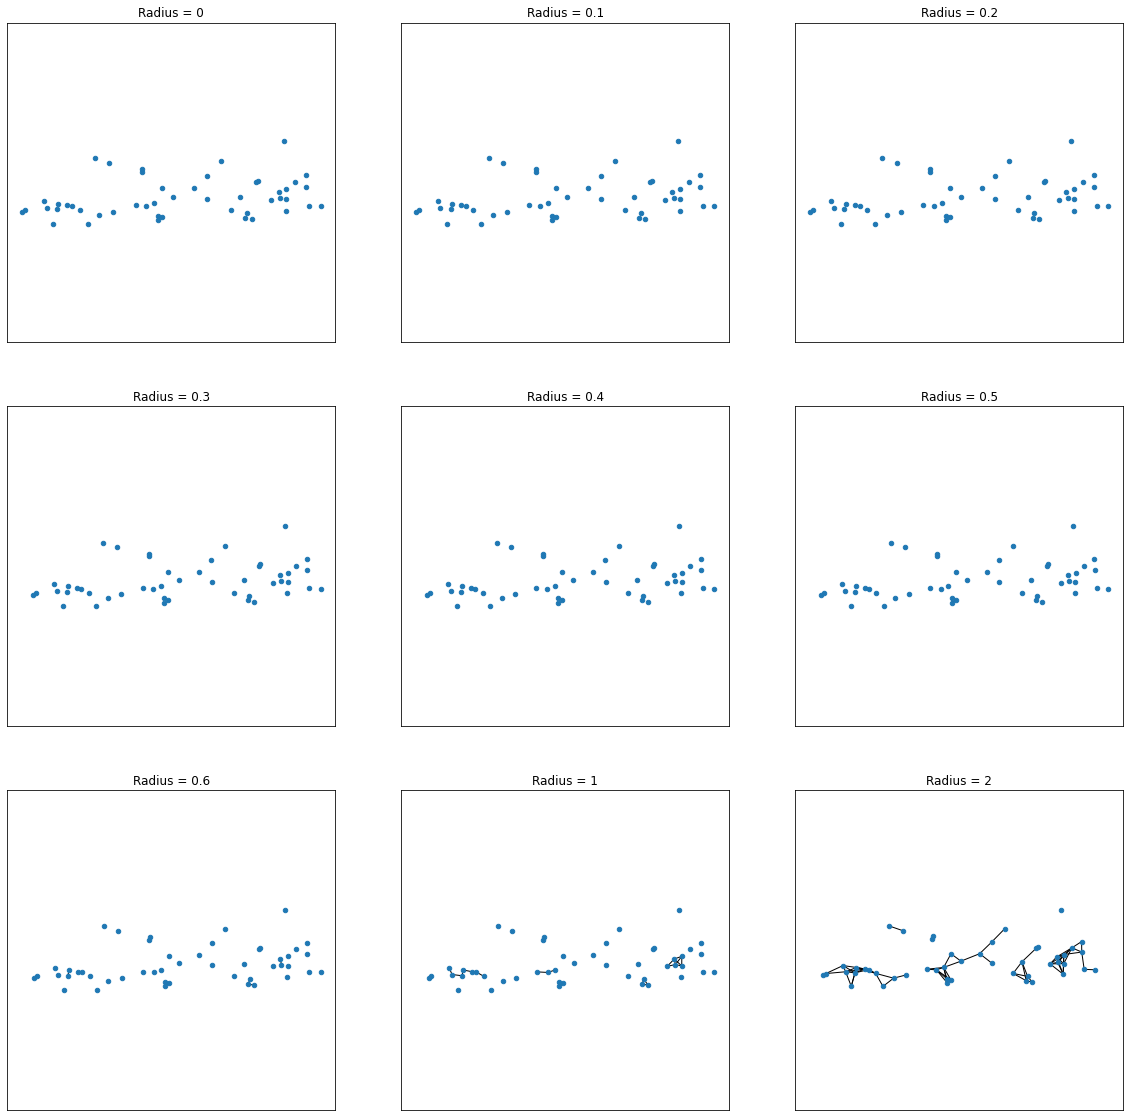

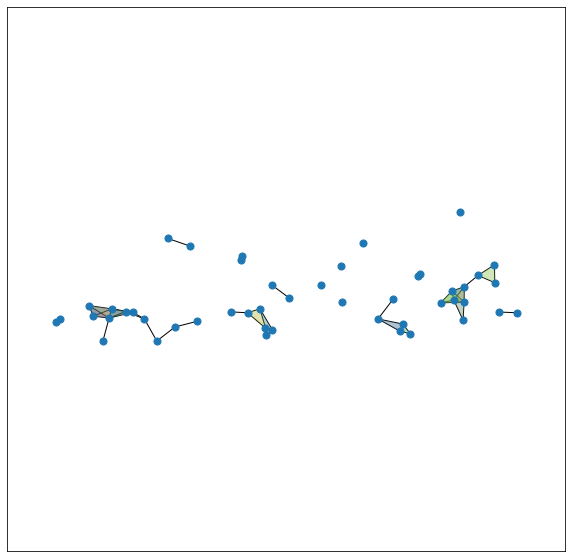

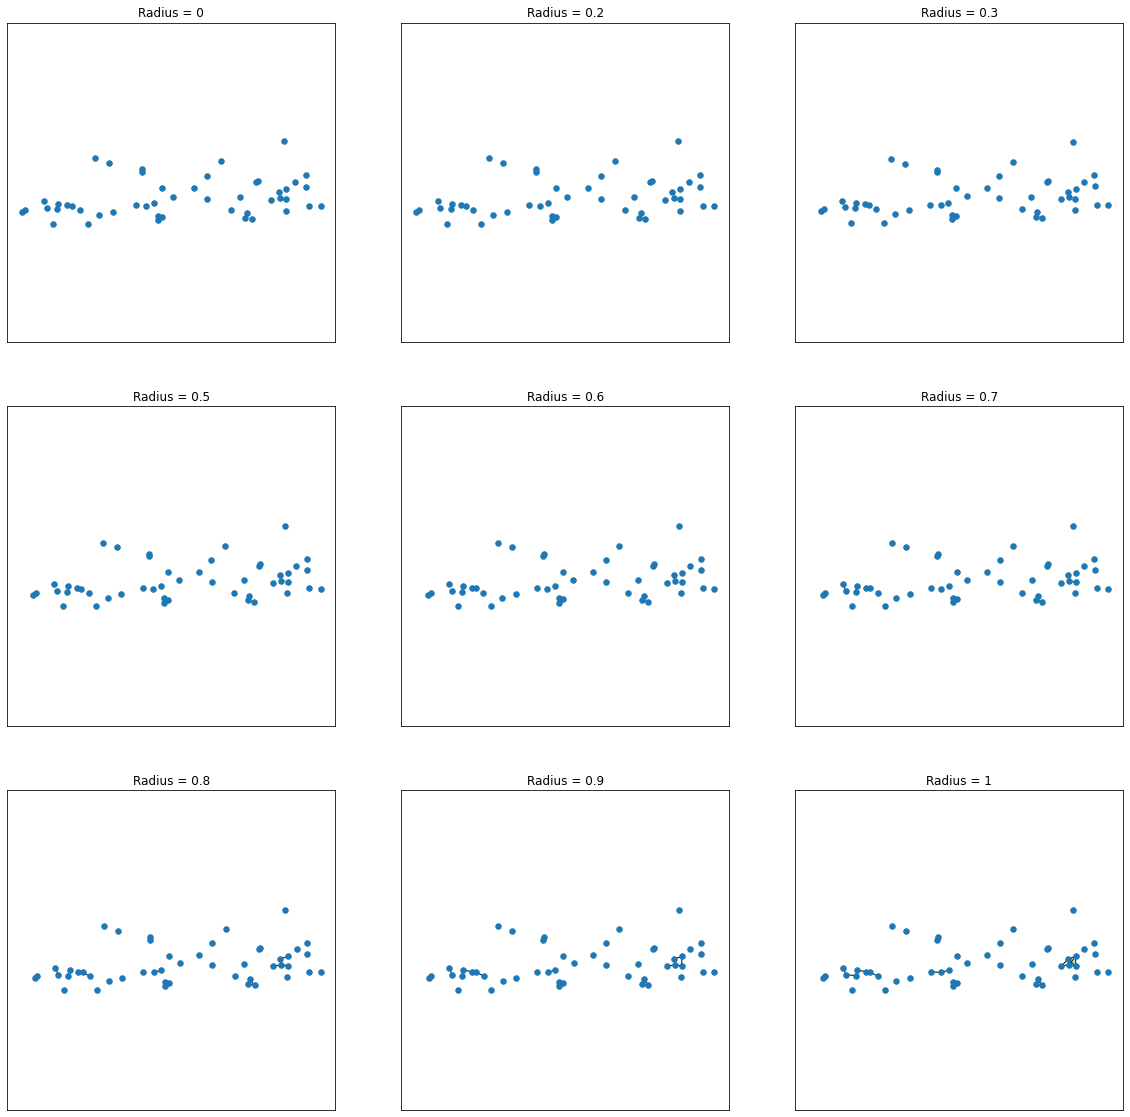

Number of Simplices: 222


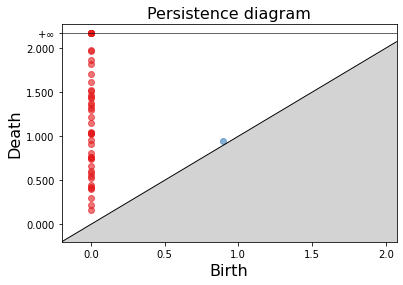

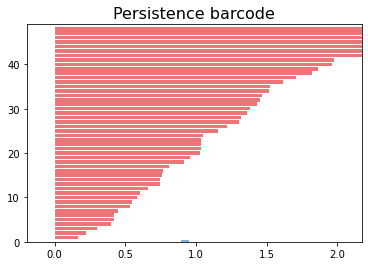

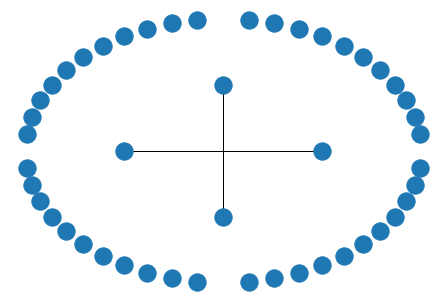

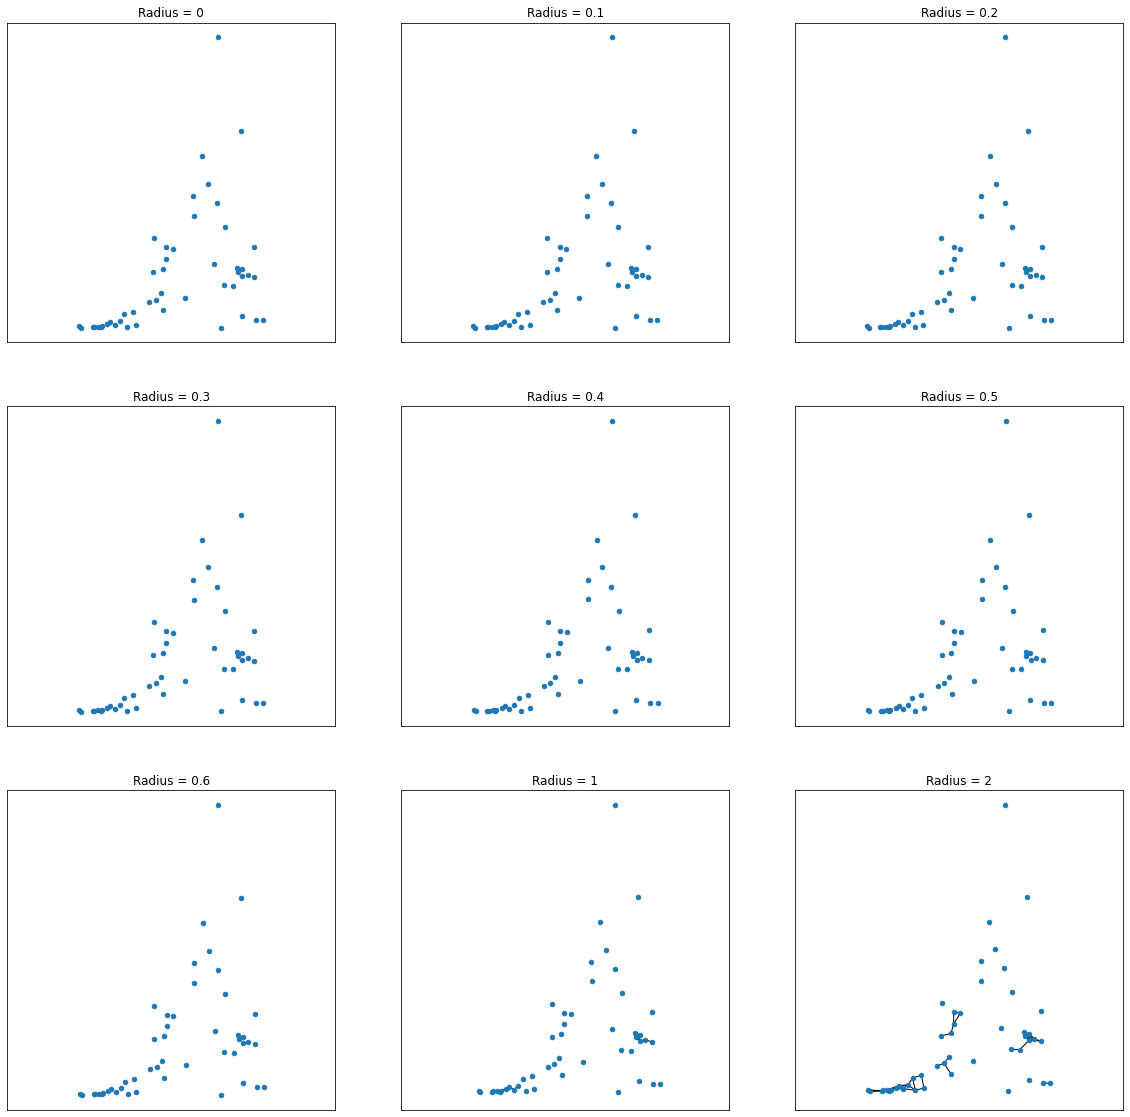

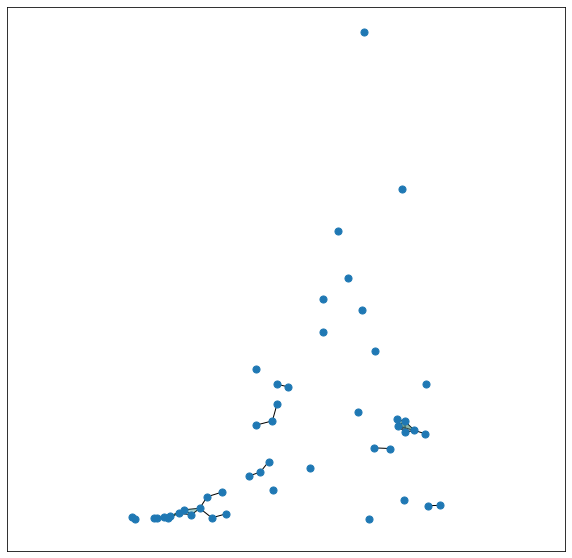

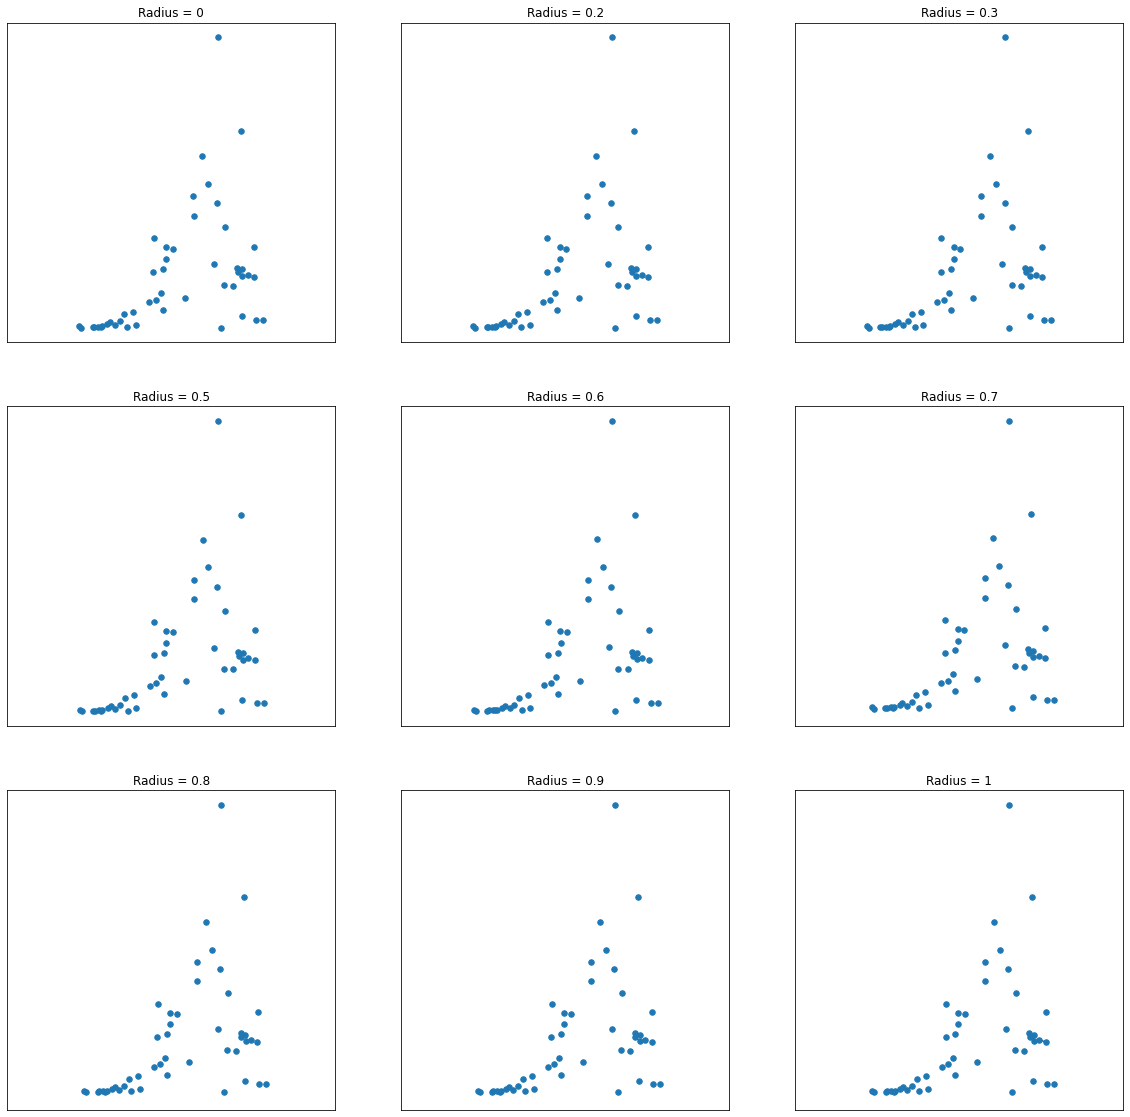

Number of Simplices: 170


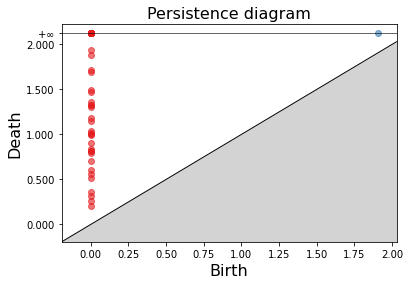

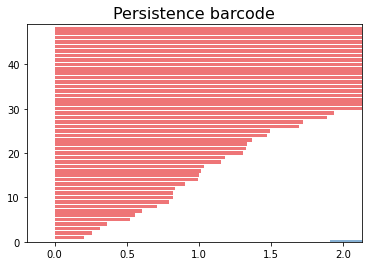

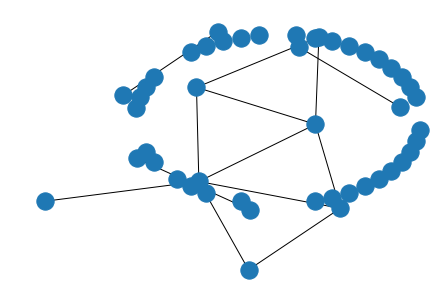

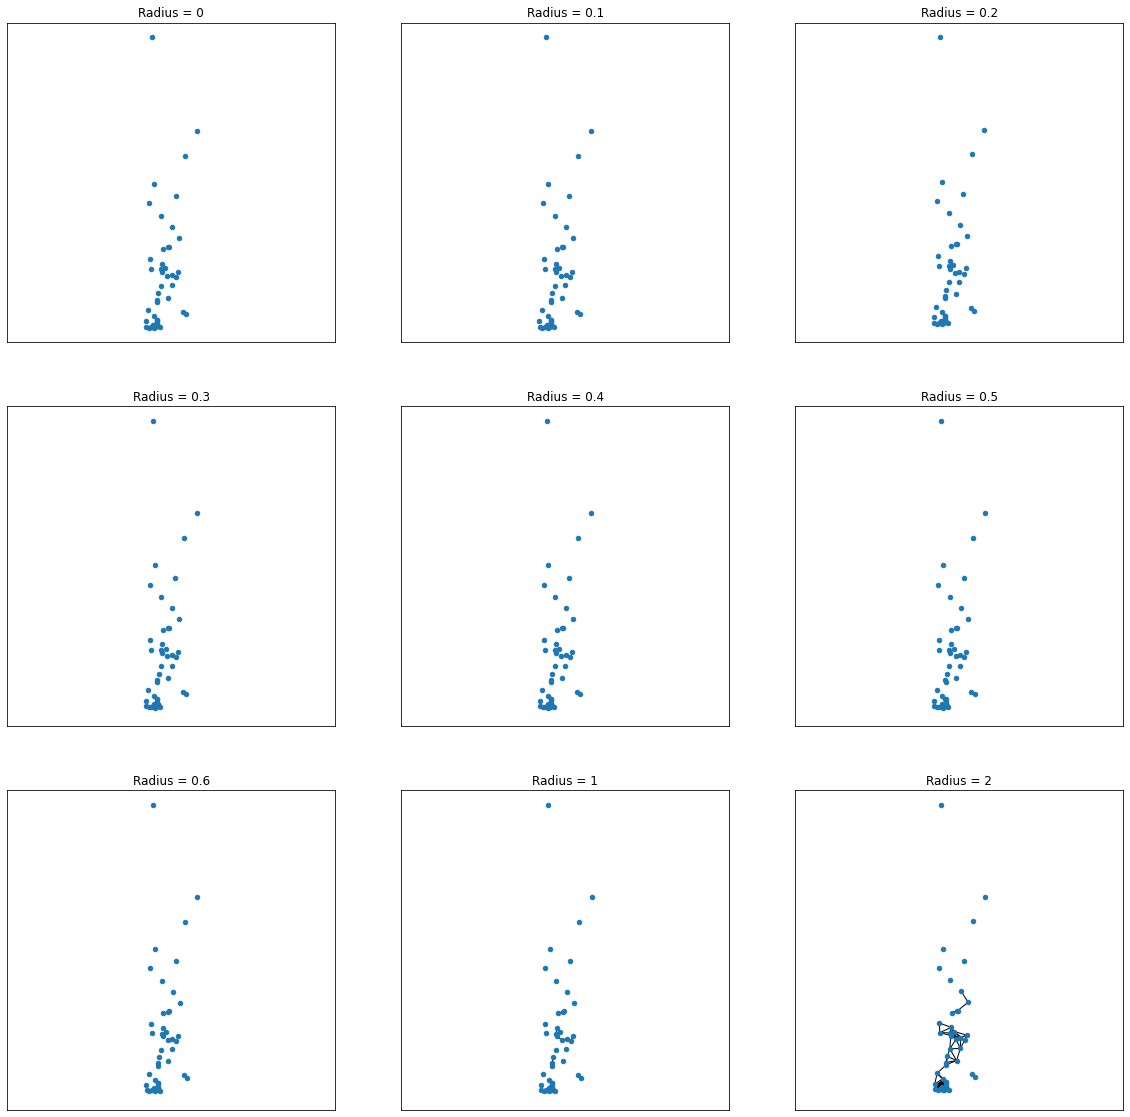

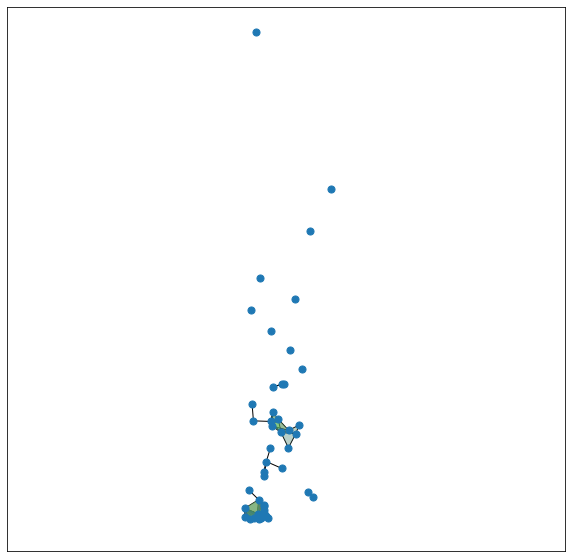

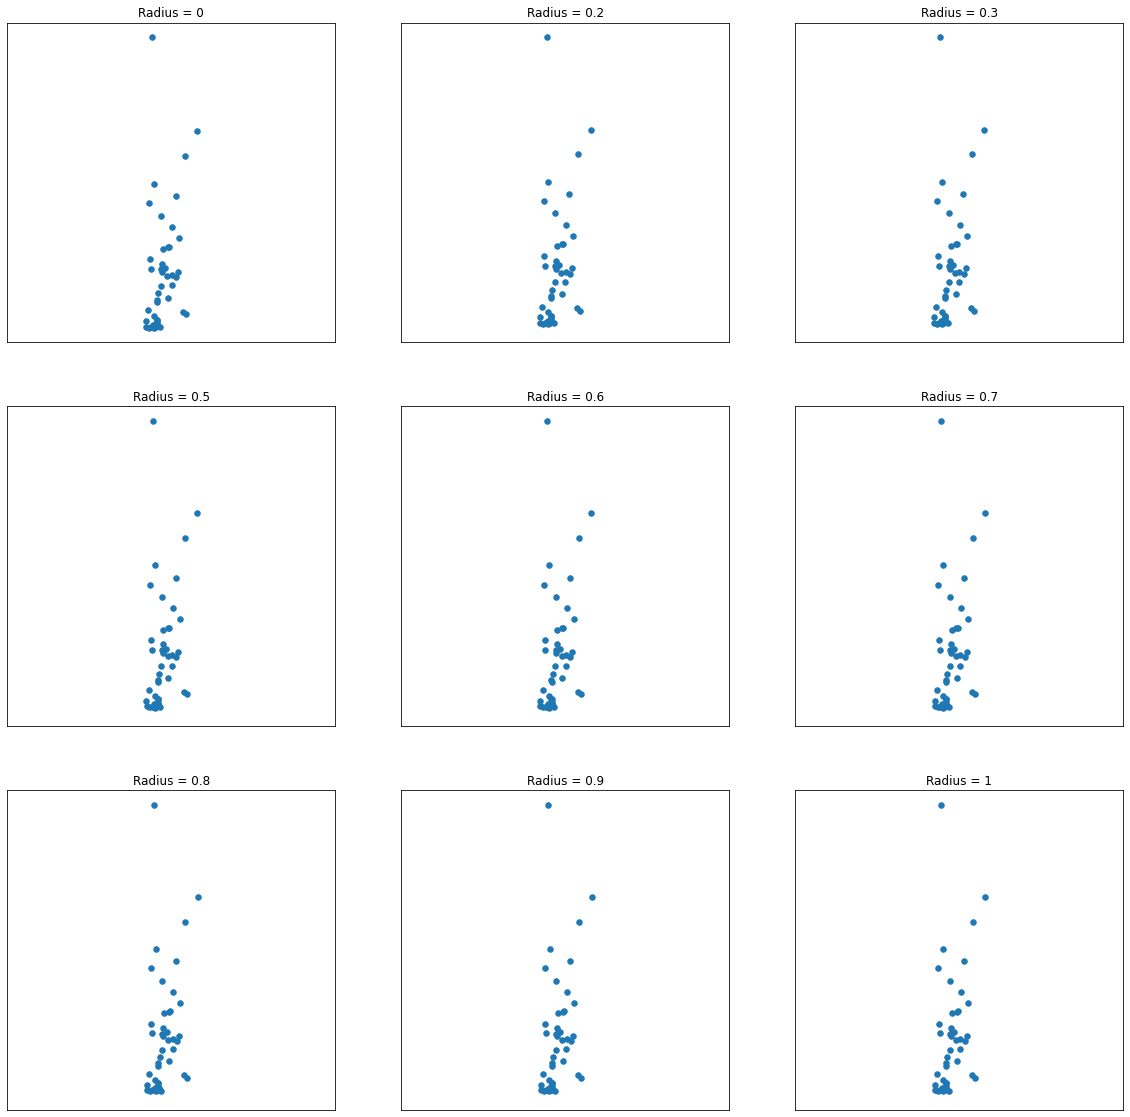

Number of Simplices: 3137


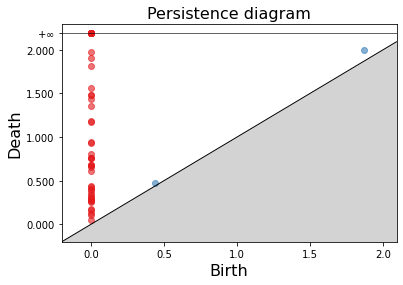

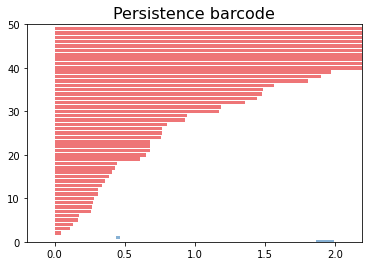

In [14]:
lotsHomologyY(1958,1962, 'Temp', 'Prec')
lotsHomologyY(1958,1962, 'Temp', 'flow')
lotsHomologyY(1958,1962, 'Prec', 'flow')

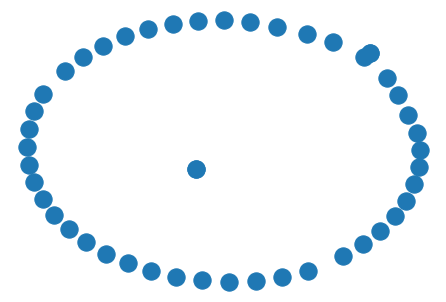

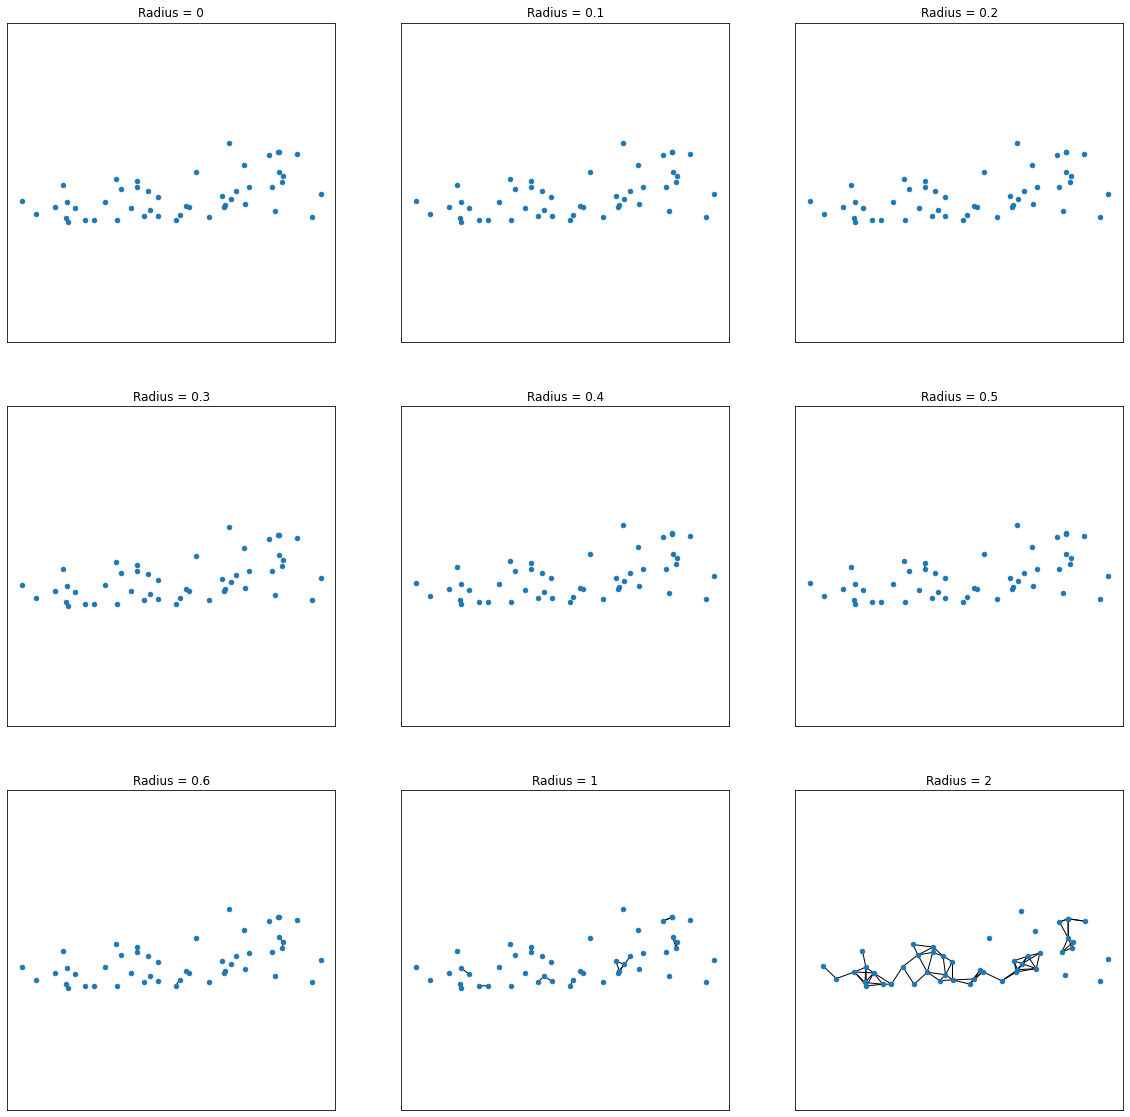

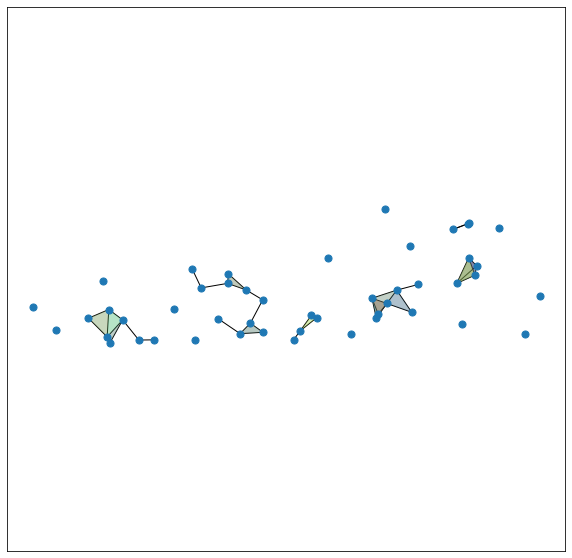

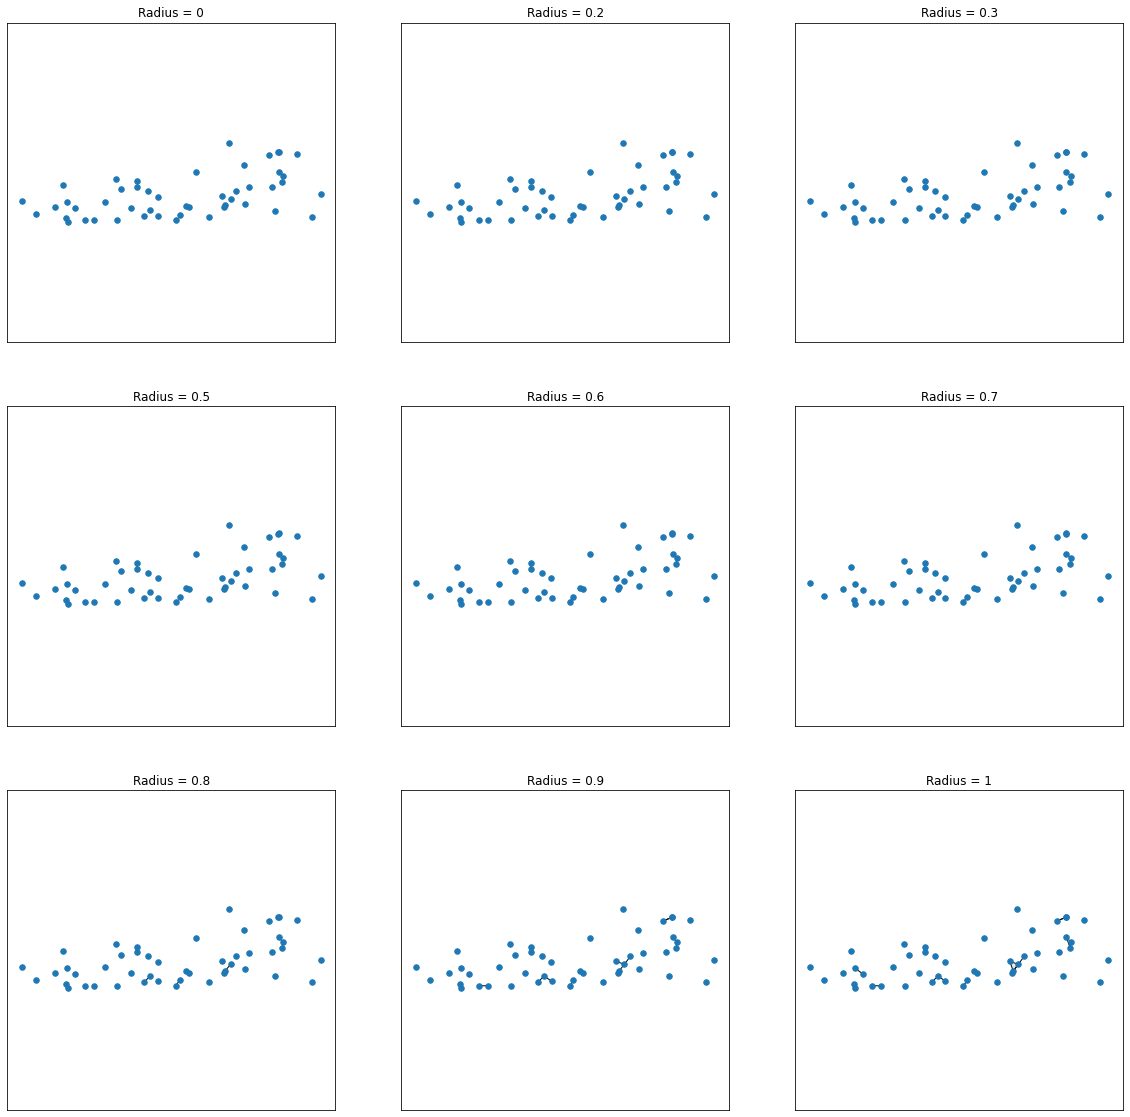

Number of Simplices: 205


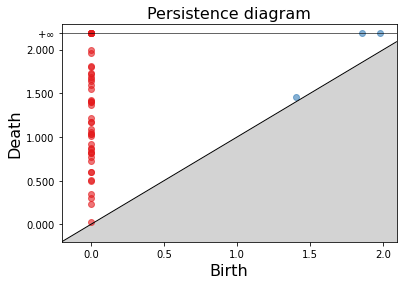

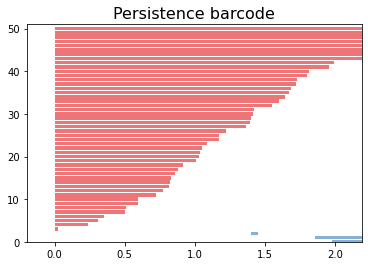

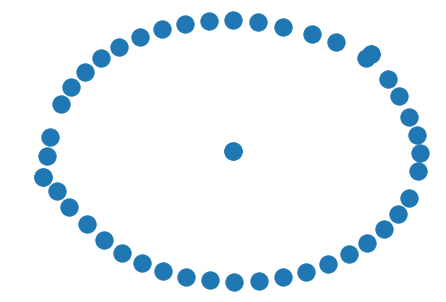

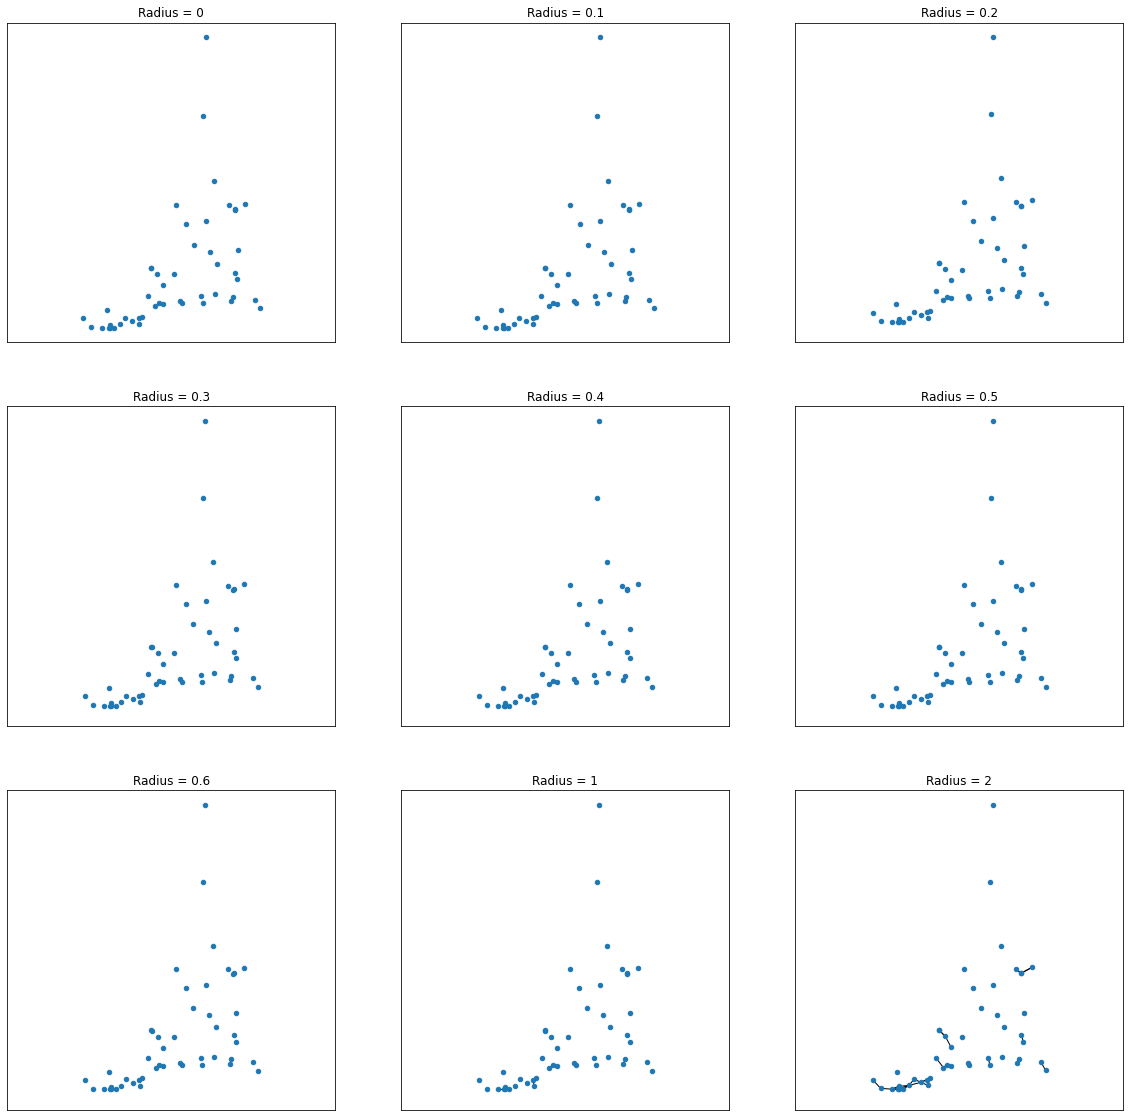

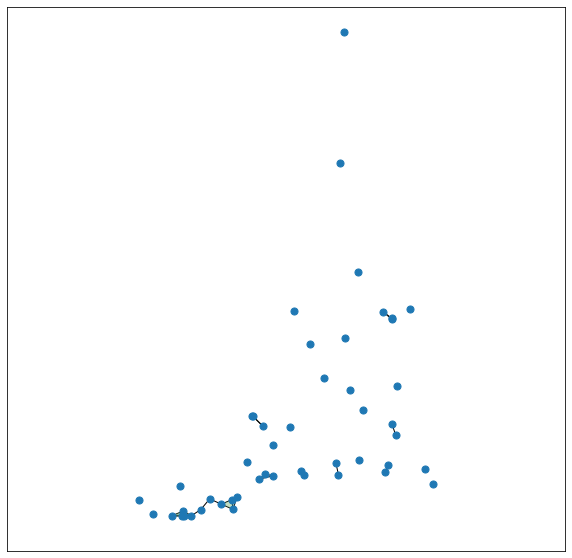

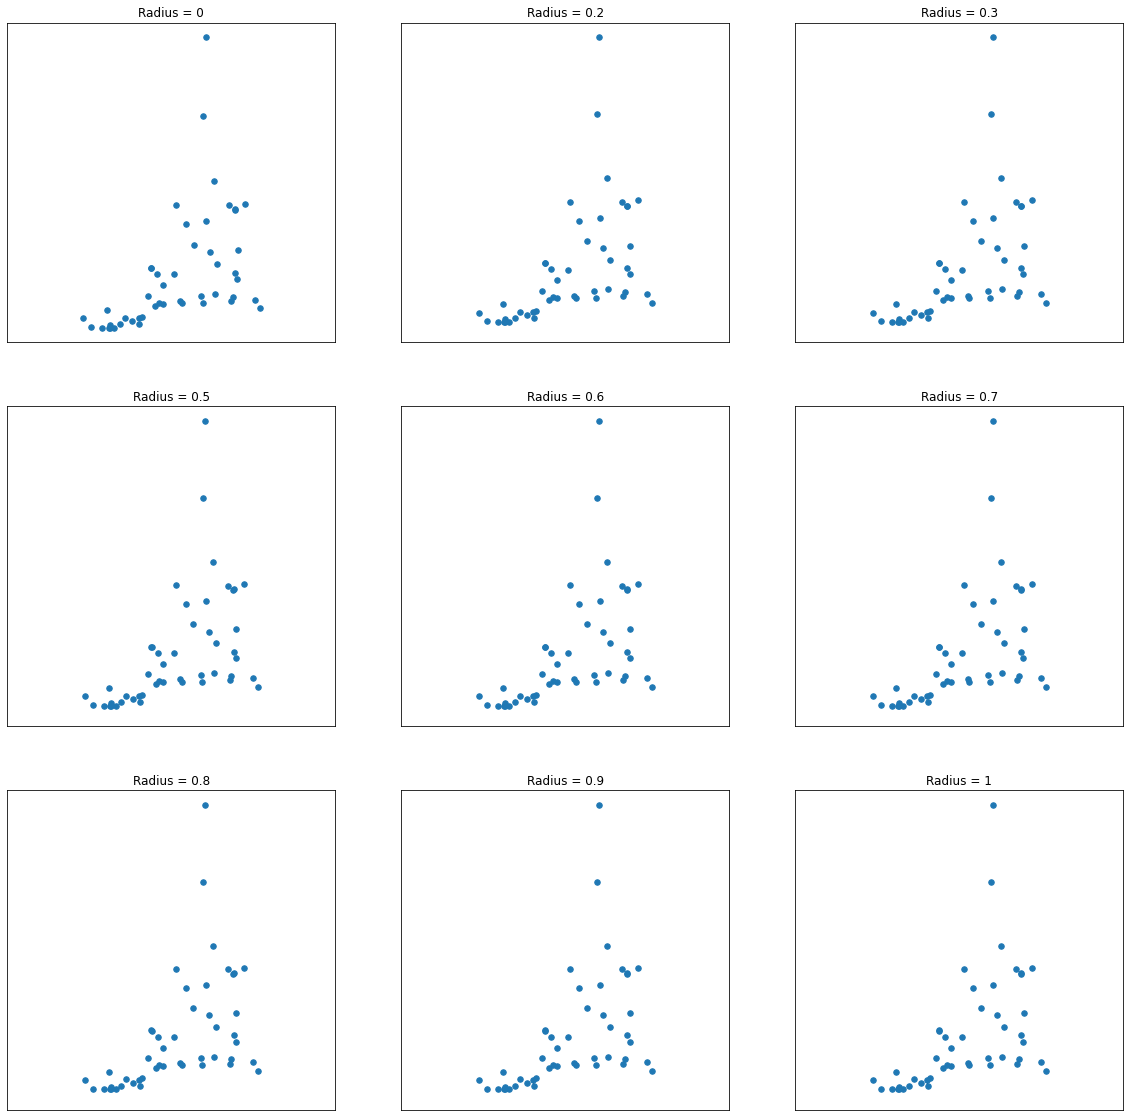

Number of Simplices: 126


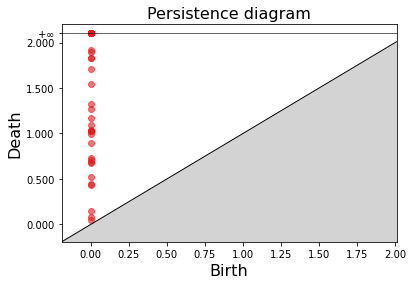

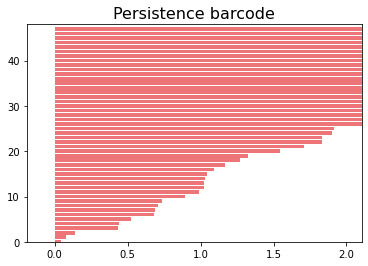

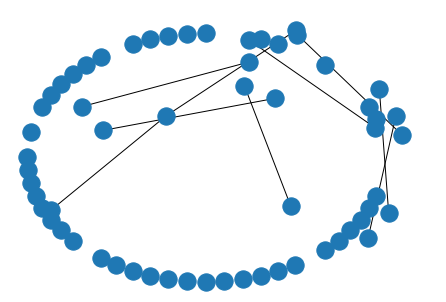

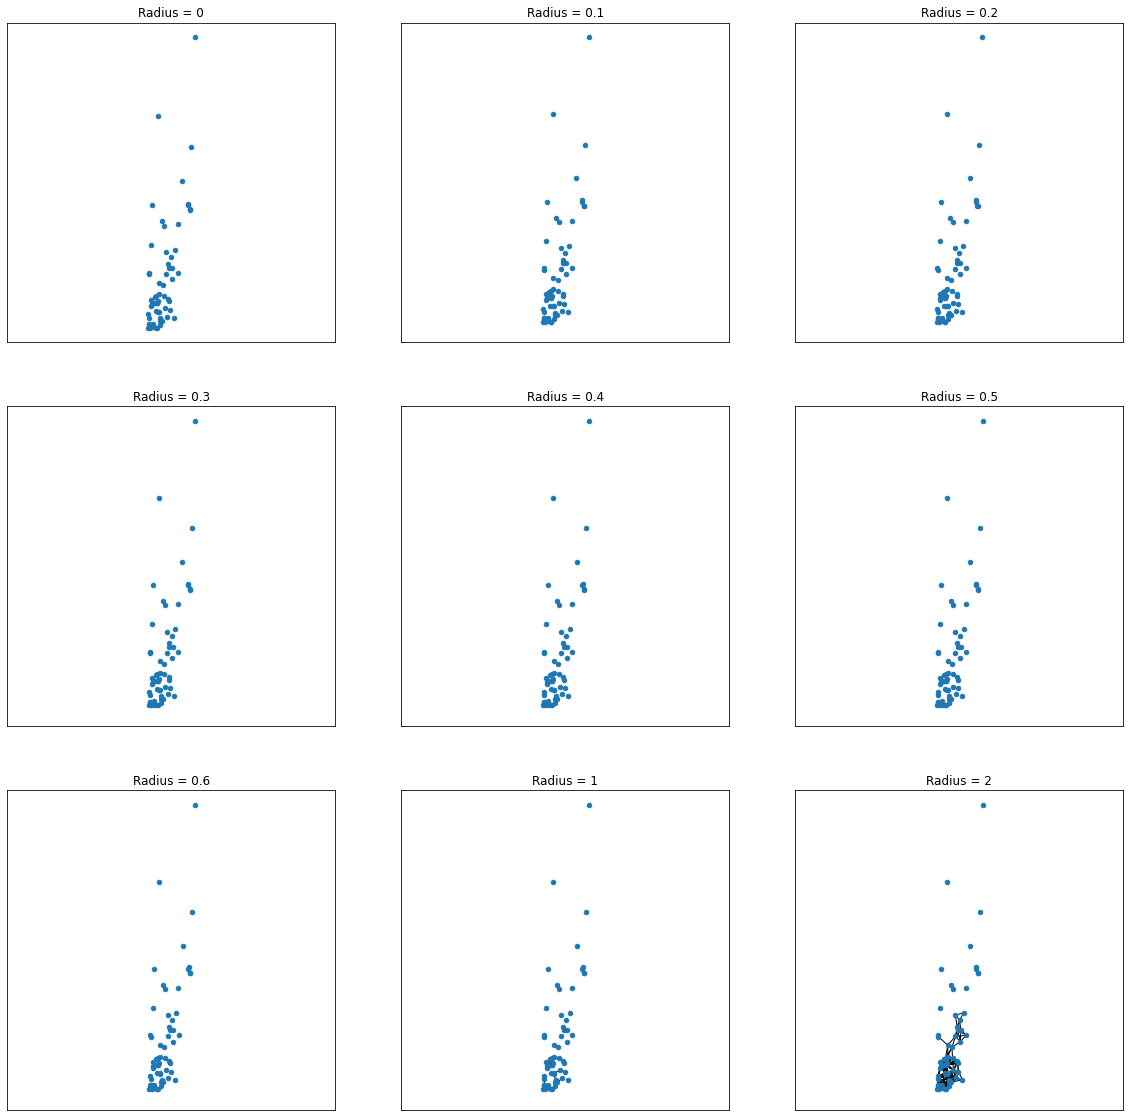

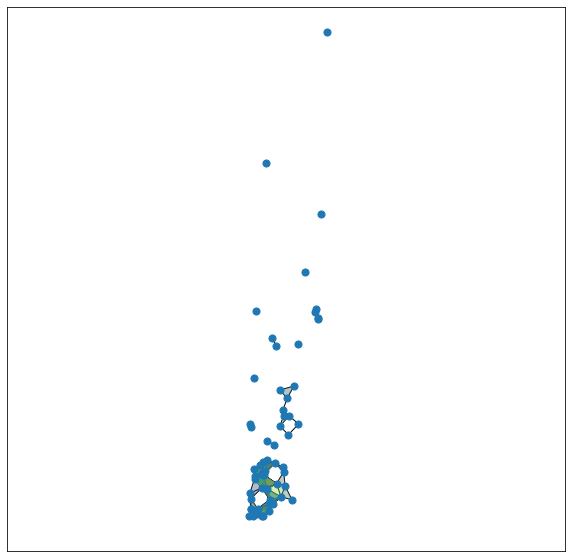

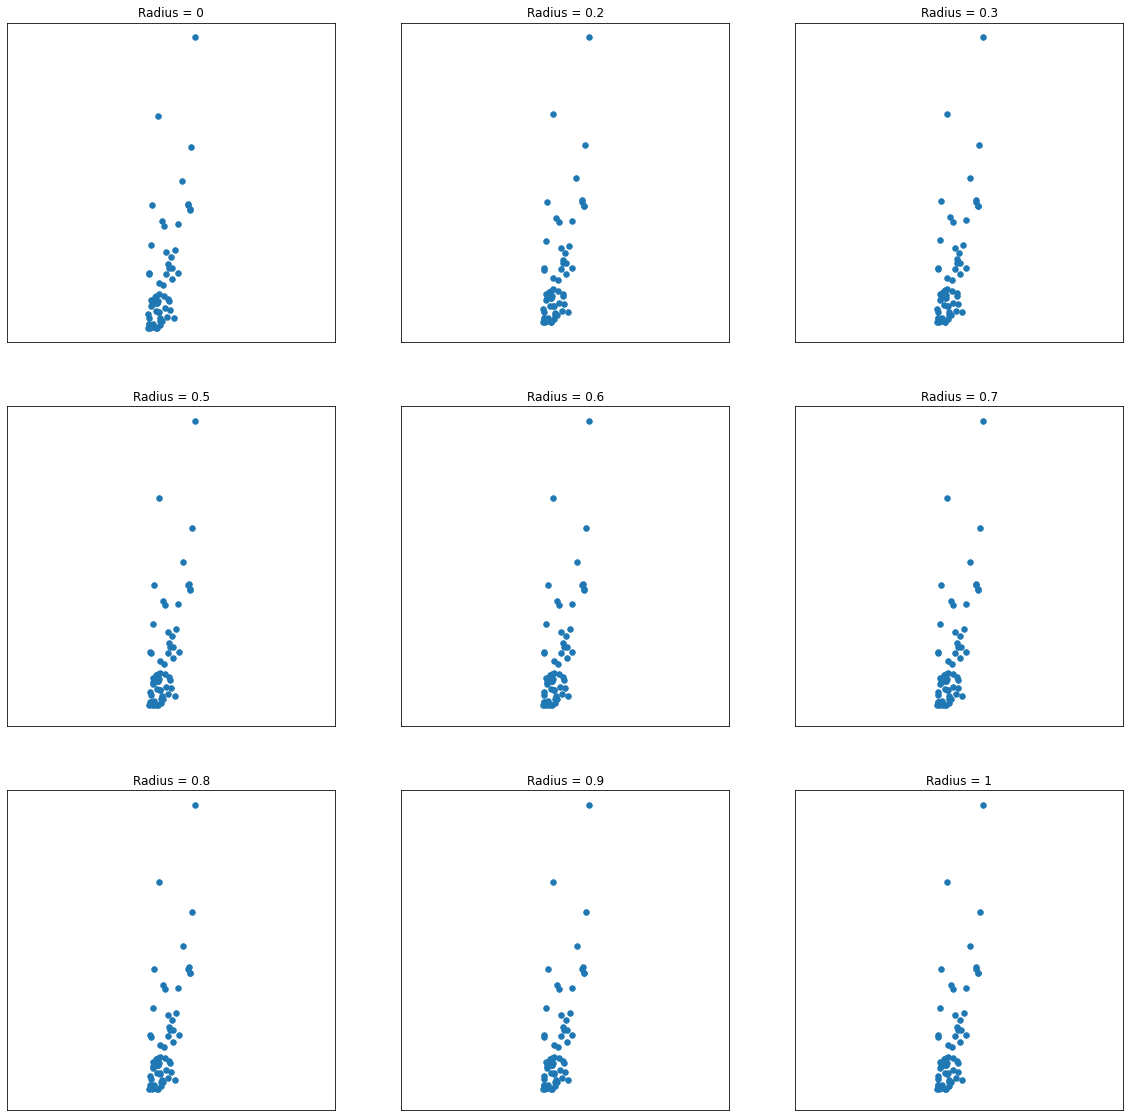

Number of Simplices: 2003


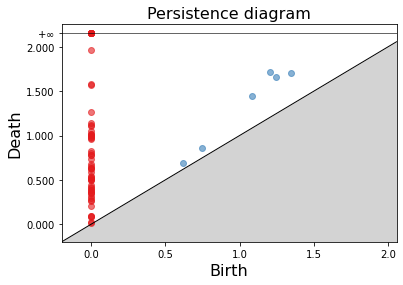

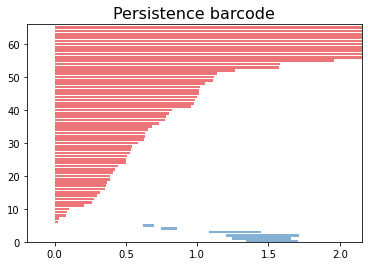

In [16]:
lotsHomologyY(2011,2015, 'Temp', 'Prec')
lotsHomologyY(2011,2015, 'Temp', 'flow')
lotsHomologyY(2011,2016, 'Prec', 'flow')

In [6]:
#%matplotlib notebook
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy.stats import multivariate_normal

X = np.linspace(-5,5,50)

Y = np.linspace(-5,5,50)

X, Y = np.meshgrid(X,Y)

X_mean = 0; Y_mean = 0

X_var = 5; Y_var = 8

pos = np.empty(X.shape+(2,))

pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal([X_mean, Y_mean],[[X_var, 0], [0, Y_var]])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

plt.show()